<a id="top"></a>  
#  Tutorial - Python SubPlots
Python **Subplots** are an excellent tool for data visualization, and provide considerable control over how data is presented visually.

This is quick tutorial on subplots.  A very short and quick one :-)

---

## Python Code for Subplots
    -----------------------------------------------
    fig = plt.figure(figsize=(8,8))   #  figure size (optional)
    
    plt.subplot(a,b,c)                #  subplot 1
    plt.plot(data_1)                  #  data 1
    
    plt.subplot(a,b,c)                #  subplot 2
    plt.plot(data_2)                  #  data 2
    
    plt.show()                        #  draw subplot group
    -----------------------------------------------
    where:
        a  - number of rows
        b  - number of columns
        c  - plot counter
      
---        

##  Three Rules for Subplots:
1. **row (a)** and **column (b)** numbers are *constant* per subplot group
2. **plot counter (c)** is ***initialized*** and then ***incremented*** for each subplot
3. **subplot(abc)** and **subplot(a,b,c)** are the same commands

---

##  Examples
1.  [Subplots - 1 x 2](#sub_1)   
2.  [Subplots - 2 x 1](#sub_2)   
3.  [Subplots - 2 x 3](#sub_3)   
4.  [Subplots with FOR Loop - example #1](#sub_for1) - one plot per attribute (column name)
5.  [Subplots with FOR Loop - example #2](#sub_for2) - three plots per attribute (column name)
6.  [Heatmaps with Subplots](#sub_heat) 
7.  [Seaborn PairPlot](#sub_pair)

---
**Please upvote if you found this helpful :-)**

---

#### Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

df = pd.read_csv("../input/heart.csv")
df.shape

['heart.csv']
heart.csv



(303, 14)

[go to top of document](#top)     

---
<a id="sub_1"></a>
## 1.  Subplots - 1 x 2 
Generate a 1x2 subplot.

*  `1`,  number of rows
*  `2`,  number of columns
*  subplot group: `(1,2,c)`

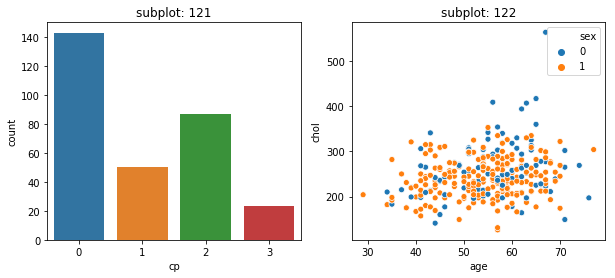

In [2]:
fig = plt.figure(figsize=(10,4))

#  subplot #1
plt.subplot(121)
plt.title('subplot: 121')
sns.countplot(data = df, x = 'cp')

#  subplot #2
plt.subplot(122)
plt.title('subplot: 122')
sns.scatterplot(data = df, x = 'age', y = 'chol', hue = 'sex')

plt.show()

[go to top of document](#top)     

---
<a id="sub_2"></a>
## 2.  Subplots - 2 x 1 
Generate a 2x1 subplot.

*  `2`,  number of rows
*  `1`,  number of columns
*  subplot group: `(2,1,c)`

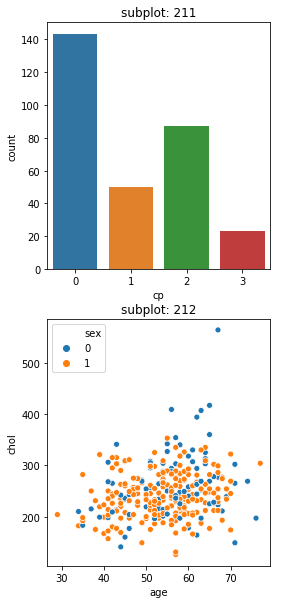

In [3]:
fig = plt.figure(figsize=(4,10))

#  subplot #1
plt.subplot(211)
plt.title('subplot: 211')
sns.countplot(data = df, x = 'cp')

#  subplot #2
plt.subplot(212)
plt.title('subplot: 212')
sns.scatterplot(data = df, x = 'age', y = 'chol', hue = 'sex')

plt.show()

[go to top of document](#top)     

---
<a id="sub_3"></a>
## 3.  Subplots - 2 x 3 
Generate a 2x3 subplots.

*  `2`,  number of rows
*  `3`,  number of columns
*  subplot group: `(2,3,c)`

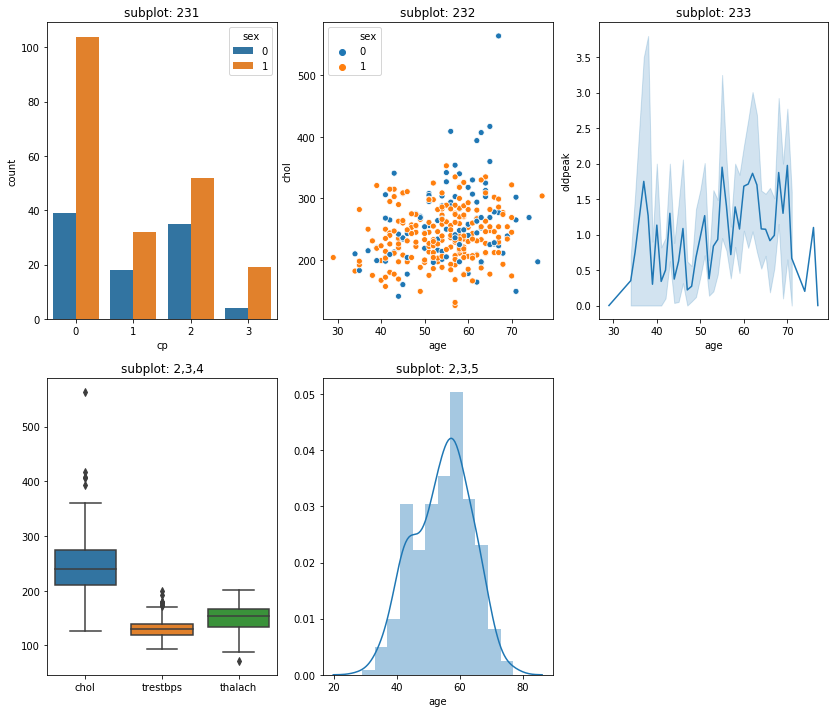

In [4]:
fig = plt.figure(figsize=(14,12))

#  subplot #1
plt.subplot(231)
plt.title('subplot: 231')
sns.countplot(data = df, x='cp',hue='sex')

#  subplot #2
plt.subplot(2,3,2)
plt.title('subplot: 232')
sns.scatterplot(data = df,x='age',y='chol',hue='sex')

#  subplot #3
plt.subplot(233)
plt.title('subplot: 233')
sns.lineplot(data = df, x=df['age'],y=df['oldpeak'])

#  subplot #4
plt.subplot(2,3,4)
plt.title('subplot: 2,3,4')
sns.boxplot(data = df[['chol','trestbps','thalach']])

#  subplot #5
plt.subplot(235)
plt.title('subplot: 2,3,5')
sns.distplot(df.age)

plt.show()

[go to top of document](#top)     

---
<a id="sub_for1"></a>
## 4.  Subplots with FOR Loop - example #1
Categorical data will be plotted.  Each attribute (column name) will have one plot.

*  `a = 2`,  number of rows
*  `b = 3`,  number of columns
*  `c = 1`,  initialize plot counter
*  subplot group: `(2,3,c)`

####  Plot Categorical Data - one plot per attribute

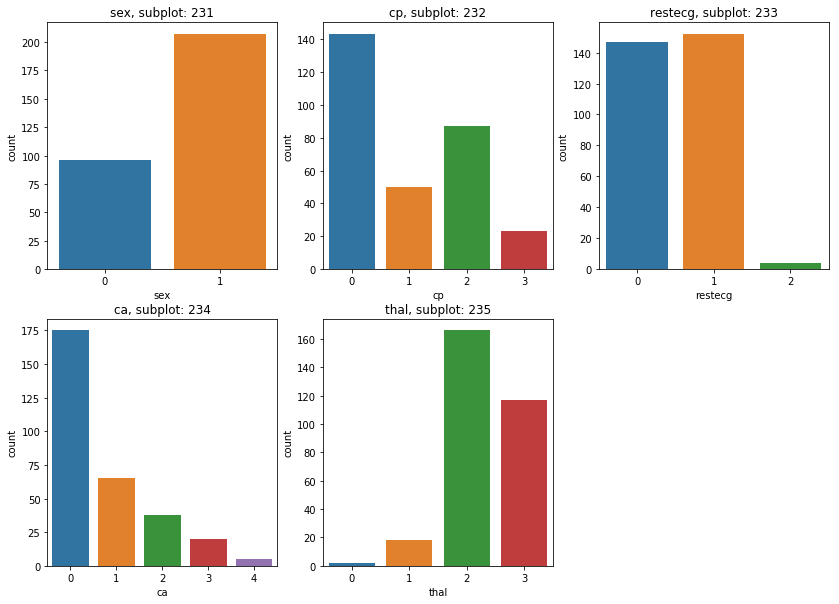

In [5]:
#  Categorical Data
heart_CAT = ['sex', 'cp', 'restecg', 'ca', 'thal']

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in heart_CAT:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(df[i])
    c = c + 1

plt.show()

[go to top of document](#top)     

---
<a id="sub_for2"></a>
## 5.  Subplots with FOR Loop - example #2
Numerical data will be plotted.  Each attribute (column name) will have three plots (distribution, box and scatter).

*  `a = 4`,  number of rows
*  `b = 3`,  number of columns
*  `c = 1`,  initialize plot counter
*  subplot group: `(4,3,c)`

####  Plot Numerical Data - three plots per attribute

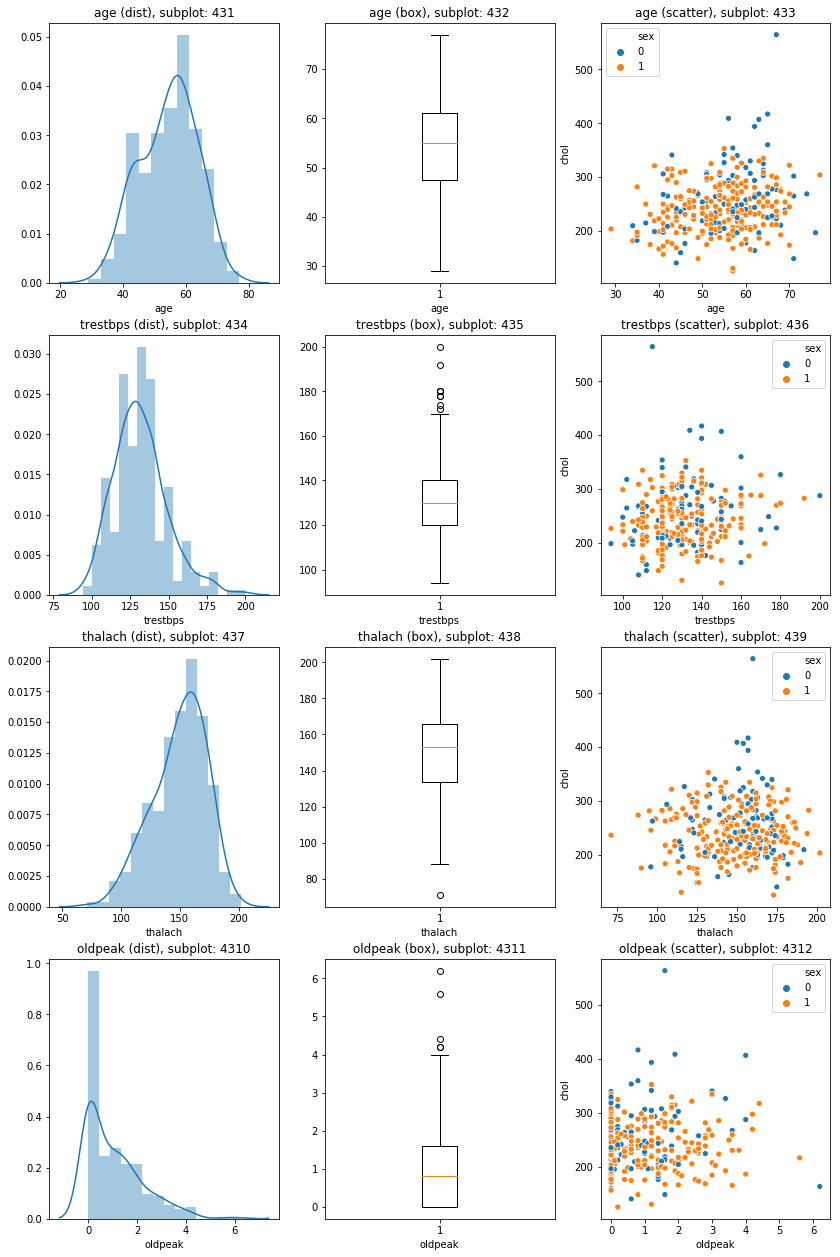

In [6]:
#  Numerical Data
heart_NUM = ['age', 'trestbps', 'thalach', 'oldpeak']

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'chol', hue = 'sex')
    c = c + 1

plt.show()

[go to top of document](#top)     

---
<a id="sub_heat"></a>
##  6.  Heatmaps with Subplots
Correlation heatmaps for both the sexes are plottled side-by-side (1x2 subplot).

*  `1`,  number of rows
*  `2`,  number of columns
*  subplot group: `(1,2,c)`

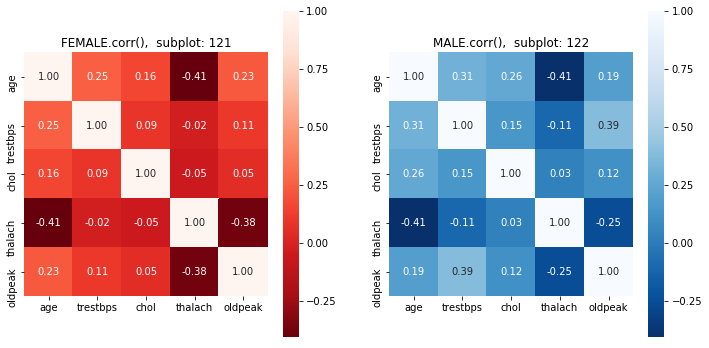

In [7]:
# select few attributes
df2 = df[['sex', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# correlation - female
dfFemale = df2[(df2['sex'] == 1)]                       # female
dfFemaleCorr = dfFemale.drop(["sex"], axis=1).corr()    # female corr
# correlation - male
dfMale   = df2[(df2['sex'] == 0)]                       # male
dfMaleCorr = dfMale.drop(["sex"], axis=1).corr()        # male corr


#  SUBPLOTS - 1x2
fig = plt.figure(figsize=(12,6))

plt.subplot(121)   #  subplot 1 - female
plt.title('FEMALE.corr(),  subplot: 121')
sns.heatmap(dfFemaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')

plt.subplot(122)   #  subplot 2 - male
plt.title('MALE.corr(),  subplot: 122')
sns.heatmap(dfMaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

plt.show()

[go to top of document](#top)     

---
<a id="sub_pair"></a>
##  7.  Seaborn `pairplot()`
Seaborn **pairplot()** creates a bivariate scatter plot for each attribute in a dataframe and automatically creates the subplots.  The diagonal axes are univariate distribution of the data for the variable in that column.

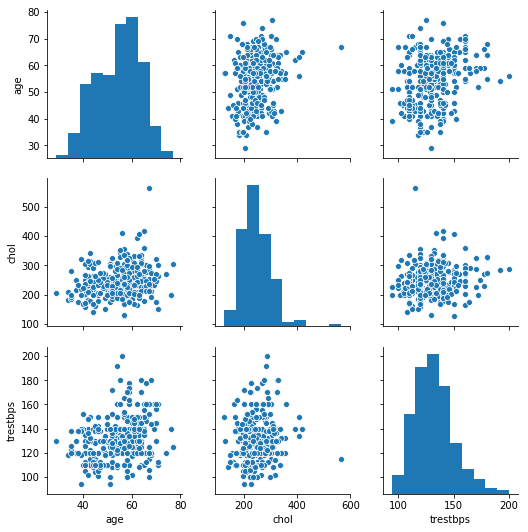

In [8]:
sns.pairplot(data = df[['age','chol','trestbps']])

[go to top of document](#top)     

##  END

---
*Please upvote if you found this helpful :-)*